In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading dataset
df=pd.read_csv("Cars Mock Data.csv")

In [102]:
#checking, cleaning and exploring
df.isnull().sum()
df.rename(columns={"Make":"Brand"},inplace=True)
df["Purchase Date"]=pd.to_datetime(df["Purchase Date"],dayfirst=True)

#Extra Columns
df["Profit"]=(df["Sale Price"])-(df["Sale Price"]*df["Discount"])
df["Quantity"]=np.random.randint(1,9,df.shape[0])
df["Revenue"]=(df["Sale Price"])*(df["Quantity"])

In [5]:
#Drop 2 rows in 2001 year
df.drop(df.index[df["Purchase Date"].between("2001-01-01","2001-12-31")],inplace=True)

### Summary

In [6]:
Ttl_Sales=df["Sale Price"].sum().round(2)
Ttl_profit=df["Profit"].sum().round(2)
Ttl_order=len(df)
Ttl_quantity=df["Quantity"].sum()
Ave_Price=df["Sale Price"].mean().round(2)

print("Total Sales- ",Ttl_Sales)
print("Total Profit- ",Ttl_profit)
print("Total Orders- ",Ttl_order)
print("Total Quantity- ",Ttl_quantity)
print("Average Price- ",Ave_Price)


Total Sales-  553470743.72
Total Profit-  360107479.71
Total Orders-  9998
Total Quantity-  45177
Average Price-  55358.15


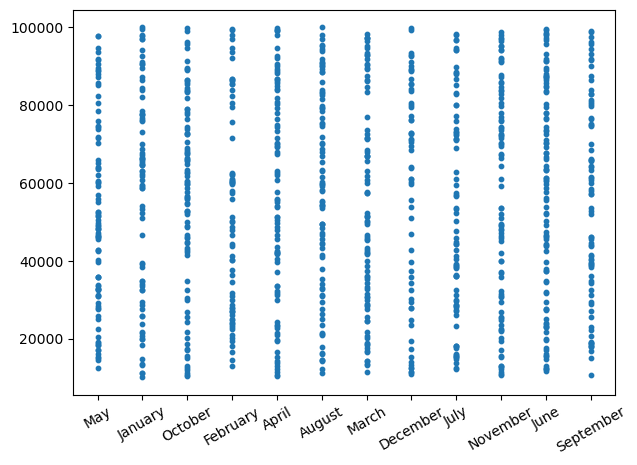

In [29]:
#sale price by month in 2019 & 2020
y_19_20=df[(df["Purchase Date"].between("2019-01-01","2020-12-31"))]
plt.figure(figsize=(7,5))
plt.scatter(y_19_20["Purchase Date"].dt.month_name(),y_19_20["Sale Price"],s=10)
plt.xticks(rotation=30);

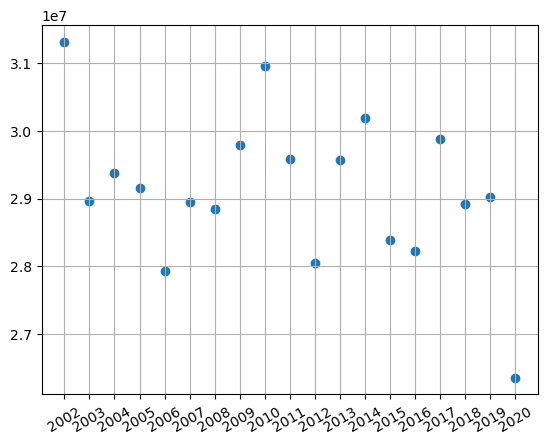

In [69]:
#sales by year
yearly=df.groupby(df["Purchase Date"].dt.year)["Sale Price"].sum()
plt.scatter(yearly.index,yearly.values)
plt.xticks(yearly.index,rotation=30)
plt.grid(True);

In [9]:
#Top 10 profitable country
profitable_country=df.groupby(by="Country")["Profit"].sum().round(3)
profitable_country.nlargest(10).round(2)

Country
China            66557445.02
Indonesia        38477235.06
Russia           20866076.61
Philippines      18584904.28
Brazil           14281416.82
Poland           12326946.36
Portugal         11266610.10
France           10124803.91
Sweden            9451177.52
United States     9268974.93
Name: Profit, dtype: float64

### Sales

In [10]:
# Gross Sales
gross_sales=df["Sale Price"].sum()
gross_sales

553470743.72

In [11]:
# Net sales
net_sales=(((df["Sale Price"])-(df["Sale Price"])*(df["Discount"]))*(df["Quantity"])).sum()
net_sales

1619842940.882127

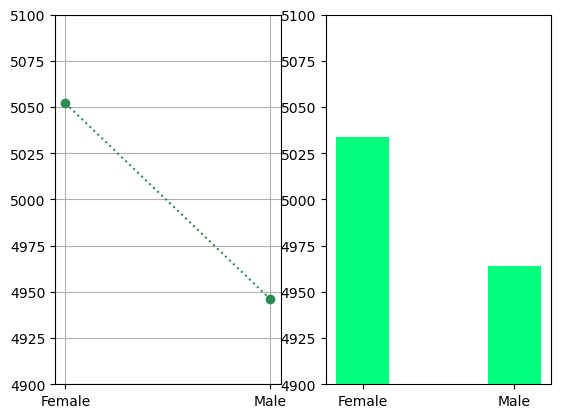

In [52]:
#Sales Price by Buyer gender & Car gender
fig,(a,b)=plt.subplots(1,2)

b_gen=df.groupby(by="Buyer Gender")["Sale Price"].count()
c_gen=df.groupby(by="Car Gender")["Sale Price"].count()

a.plot(b_gen.index,b_gen.values,color="seagreen",marker="o",linestyle=':')
a.set_ylim(4900,5100)
a.grid(True)
b.bar(c_gen.index,c_gen.values,color="springgreen",width=0.35)
b.set_ylim(4900,5100);


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

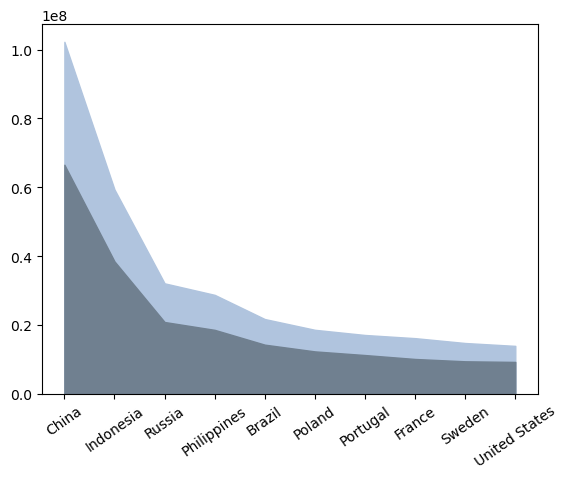

In [56]:
#sales and profit by top countries

top_sale=df.groupby(by="Country")["Sale Price"].sum().nlargest(10)
prof_con=profitable_country.nlargest(10)
plt.stackplot(top_sale.index,[top_sale.values],color=["lightsteelblue"])
plt.stackplot(top_sale.index,[prof_con.values],color=["slategrey"])
plt.xticks(rotation=35)
plt

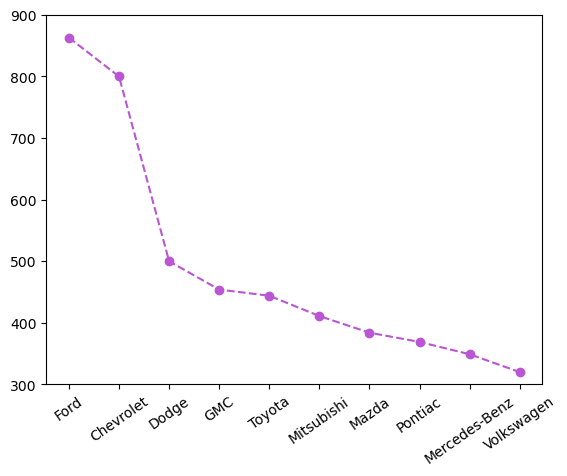

In [58]:
#top selling brands
top_brand=df.groupby(by="Brand")["Sale Price"].count().nlargest(10)
plt.plot(top_brand.index,top_brand.values,marker="o",linestyle="--",c="mediumorchid")
plt.xticks(rotation=35)
plt.ylim(300,900);

In [16]:
#total revenue by Year
yearly_rev=df.groupby(df["Purchase Date"].dt.year)["Revenue"].sum()
yearly_rev

Purchase Date
2002    1.332918e+08
2003    1.297571e+08
2004    1.329060e+08
2005    1.413426e+08
2006    1.267882e+08
2007    1.339877e+08
2008    1.330028e+08
2009    1.301965e+08
2010    1.384925e+08
2011    1.246327e+08
2012    1.261830e+08
2013    1.301588e+08
2014    1.303172e+08
2015    1.267771e+08
2016    1.299472e+08
2017    1.404921e+08
2018    1.336360e+08
2019    1.308422e+08
2020    1.195789e+08
Name: Revenue, dtype: float64

### Product

In [17]:
#Total Quantity
Ttl_qty=df["Quantity"].sum()
Ttl_qty

45177

In [18]:
#Item sold by Brand in 2020
sales_in_2020=df[(df["Purchase Date"].between("2020-01-01","2020-12-31"))]
itm_by_brand=sales_in_2020.groupby(by="Brand")["Quantity"].sum()
itm_by_brand

Brand
Acura             28
Alfa Romeo         9
Aston Martin      20
Audi              48
BMW               68
Bentley           15
Buick             67
Cadillac          32
Chevrolet        197
Chrysler          65
Daewoo             7
Dodge            145
Ferrari            6
Ford             199
GMC               93
Holden             3
Honda             49
Hummer             3
Hyundai           48
Infiniti          53
Isuzu             14
Jaguar            26
Jeep              29
Jensen             1
Kia               22
Lamborghini       23
Land Rover        13
Lexus             54
Lincoln           34
Lotus             21
MINI               6
Maserati           5
Mazda             41
Mercedes-Benz     62
Mercury           49
Merkur             5
Mitsubishi        91
Nissan            40
Oldsmobile        34
Plymouth           3
Pontiac          103
Porsche           30
Ram                2
Saab              19
Saturn             9
Scion              8
Subaru            29
Suzuki 

In [19]:
#Most discounted car
df.loc[df["Discount"].idxmax(),["Brand","Model","Discount"]]

Brand       Mitsubishi
Model           Galant
Discount           0.7
Name: 8598, dtype: object

In [59]:
#Color Sold
df.groupby(by="Color")["Brand"].count()

Color
Aquamarine    525
Blue          507
Crimson       541
Fuscia        497
Goldenrod     530
Green         495
Indigo        513
Khaki         484
Maroon        529
Mauv          577
Orange        549
Pink          537
Puce          509
Purple        514
Red           495
Teal          545
Turquoise     545
Violet        542
Yellow        564
Name: Brand, dtype: int64

In [21]:
#Top Profitable resell price
rsl_price=(df["Resell Price"])-(df["Sale Price"])
rsl_price.nlargest()

188     39459.61
8784    39455.59
6853    38499.53
7043    38483.63
271     38424.75
dtype: float64

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

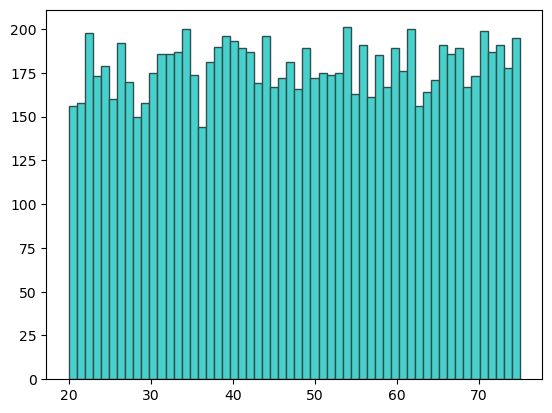

In [64]:
# Orders by age
plt.hist(df["Buyer Age"],edgecolor="darkslategrey",bins=56,color="mediumturquoise") #age per bar
plt

In [23]:
#Fastest Car
df.loc[df["Top Speed"].max(),["Brand","Model"]]

Brand    Toyota
Model    Sienna
Name: 250, dtype: object

### 2019  vs  2020

In [97]:
# 2019  vs  2018
y2019=df[df["Purchase Date"].between('2019-01-01','2019-12-31')]
y2020=df[df["Purchase Date"].between('2020-01-01','2020-12-31')]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

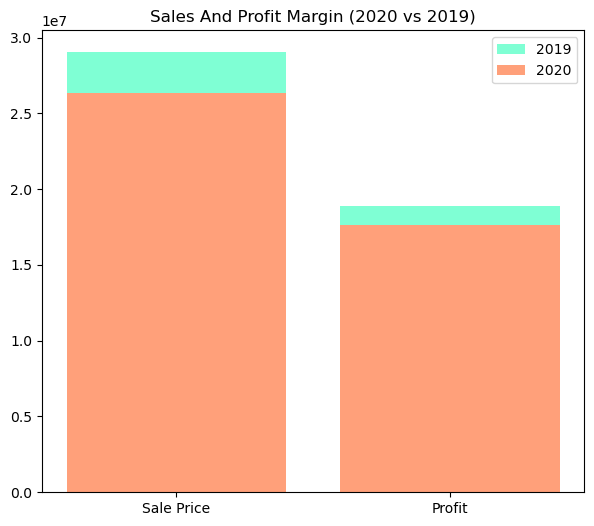

In [100]:
# Quantity, sales, profit
c_name=y2020[["Sale Price","Profit"]].columns.tolist()

q_2020=y2020["Quantity"].sum()
q_2019=y2019["Quantity"].sum()

s_2020=y2020["Sale Price"].sum()
s_2019=y2019["Sale Price"].sum()

p_2020=y2020["Profit"].sum()
p_2019=y2019["Profit"].sum()

plt.figure(figsize=(7, 6))
w=.5
plt.bar(c_name,[s_2019, p_2019], color='aquamarine',label="2019")
plt.bar(c_name,[s_2020+w, p_2020], color='LightSalmon',label="2020")
plt.title('Sales And Profit Margin (2020 vs 2019)')
plt.legend()
plt
